In [3]:
import numpy as np
import pandas as pd
import spacy
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from collections import Counter

/Users/Mazarinetulp/Documents/nlpass2/NLP_group_9/NLP/.venv/bin/python
scikit-learn              1.5.2


In [4]:

df = pd.read_parquet('data/processed/preprocessed_df.parquet')

print(df.preprocessed_content[:5])

24    [ecb, effect, move, euro, huge, falling, pip, ...
32    [stock, watch, march, trading, session, stock,...
57    [rout, apple, facebook, nasdaq, fb, monday, sw...
78    [immediate, releasechicago, il, january, annou...
82    [company, bringing, innovation, ce, jan, get, ...
Name: preprocessed_content, dtype: object


In [3]:

import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Ensure NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load dataset
file_path = '/Users/Mazarinetulp/Documents/nlpass2/NLP_group_9/NLP/nlp/data/raw/us_equities_news_dataset.csv'
articles = pd.read_csv(file_path)
articles['content'] = articles['content'].astype(str)  # Convert 'content' column to string
articles['title'] = articles['title'].str.lower()
articles['content'] = articles['content'].str.lower()

# Filter for articles mentioning Nvidia
nvidia_articles = articles[articles['title'].str.contains('nvidia') | articles['content'].str.contains('nvidia')].copy()

articles.head()


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/Mazarinetulp/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Mazarinetulp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/Mazarinetulp/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,id,ticker,title,category,content,release_date,provider,url,article_id
0,221515,NIO,why shares of chinese electric car maker nio a...,news,what s happening\nshares of chinese electric c...,2020-01-15,The Motley Fool,https://invst.ly/pigqi,2060327
1,221516,NIO,nio only consumer gainer workhorse group amon...,news,gainers nio nyse nio 7 \nlosers mgp ingr...,2020-01-18,Seeking Alpha,https://invst.ly/pje9c,2062196
2,221517,NIO,nio leads consumer gainers beyond meat and ma...,news,gainers nio nyse nio 14 village farms in...,2020-01-15,Seeking Alpha,https://invst.ly/pifmv,2060249
3,221518,NIO,nio nvax among premarket gainers,news,cemtrex nasdaq cetx 85 after fy results \n...,2020-01-15,Seeking Alpha,https://invst.ly/picu8,2060039
4,221519,NIO,plug nio among premarket gainers,news,atyr pharma nasdaq life 63 on kyorin pharm...,2020-01-06,Seeking Alpha,https://seekingalpha.com/news/3529772-plug-nio...,2053096


In [5]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return tokens  # Returning tokens for topic modeling

# Apply preprocessing
nvidia_articles['processed_content'] = nvidia_articles['content'].apply(preprocess_text)


In [6]:
processed_texts = nvidia_articles['processed_content'].tolist()


In [8]:
from FuzzyTM import FLSA_W
flsaW = FLSA_W(
input_file = processed_texts,
num_topics=10,
num_words=10,
)

pwgt, ptgd = flsaW.get_matrices() # THIS TRAINS THE MODEL

# Display topics and evaluation metrics
print(flsaW.show_topics())
print("Vocabulary Size:", flsaW.get_vocabulary_size())
print("Coherence Score:", flsaW.get_coherence_score())
print("Diversity Score:", flsaW.get_diversity_score())
print("Interpretability Score:", flsaW.get_interpretability_score())

for topic in flsaW.show_topics(representation='words'):
    print(topic)


[(0, '0.0028*"corporation" + 0.0026*"inc" + 0.0026*"broader" + 0.0023*"gained" + 0.0022*"beat" + 0.0022*"led" + 0.0022*"com" + 0.0022*"intc" + 0.0022*"holding" + 0.0021*"giant"'), (1, '0.0002*"delisting" + 0.0002*"supervisory" + 0.0002*"upnoteus" + 0.0002*"whileolympusshares" + 0.0002*"equitiesasian" + 0.0002*"icera" + 0.0002*"pcg" + 0.0002*"chee" + 0.0002*"foo" + 0.0002*"otcpk"'), (2, '0.001*"ounce" + 0.001*"unchanged" + 0.0009*"uncover" + 0.0009*"philadelphia" + 0.0009*"esp" + 0.0009*"greenback" + 0.0008*"brent" + 0.0008*"amat" + 0.0008*"gainer" + 0.0008*"trillionaires"'), (3, '0.0065*"nvda" + 0.0064*"nvidia" + 0.0053*"nyse" + 0.0051*"hold" + 0.0048*"likely" + 0.0047*"zacks" + 0.0047*"trade" + 0.0047*"p" + 0.0047*"top" + 0.0046*"best"'), (4, '0.0175*"book" + 0.0165*"evolution" + 0.0099*"richard" + 0.0088*"synthesis" + 0.0085*"creativity" + 0.0077*"feynman" + 0.0075*"pretend" + 0.0075*"certainty" + 0.0073*"educator" + 0.007*"professor"'), (5, '0.0008*"gmt" + 0.0007*"settle" + 0.0007*"

In [12]:
from collections import Counter

def filter_top_bottom_words(processed_texts, n=5):
    # Flatten list of lists to get all words in the corpus
    word_freq = Counter([word for sentence in processed_texts for word in sentence])

    # Get top-n% and bottom-n% words
    top_n = set(word for word, _ in word_freq.most_common(int(n / 100 * len(word_freq))))
    bottom_n = set(word for word, _ in word_freq.most_common()[:-int(n / 100 * len(word_freq)) - 1:-1])

    # Filter words in each sentence
    filtered_texts = [[word for word in sentence if word not in top_n and word not in bottom_n] for sentence in processed_texts]
    return filtered_texts

# Apply filtering
filtered_texts = filter_top_bottom_words(nvidia_articles['processed_content'].tolist(), n=5)  # Adjust n as needed

# Remove empty lists from filtered_texts
filtered_texts = [text for text in filtered_texts if len(text) > 0]


flsaW2 = FLSA_W(input_file=filtered_texts, num_topics=10, num_words=10)
pwgt, ptgd = flsaW2.get_matrices()

# Display topics and evaluation metrics
print(flsaW2.show_topics())
print("Vocabulary Size:", flsaW2.get_vocabulary_size())
print("Coherence Score:", flsaW2.get_coherence_score())
print("Diversity Score:", flsaW2.get_diversity_score())
print("Interpretability Score:", flsaW2.get_interpretability_score())

for topic in flsaW2.show_topics(representation='words'):
    print(topic)


[(0, '0.008*"room" + 0.0069*"extended" + 0.0067*"bringing" + 0.0067*"engagement" + 0.0064*"happening" + 0.0063*"la" + 0.0061*"intensive" + 0.006*"shop" + 0.006*"crossed" + 0.0059*"switching"'), (1, '0.0003*"troy" + 0.0003*"smh" + 0.0003*"reiterates" + 0.0003*"saysaccording" + 0.0002*"combinationhere" + 0.0002*"xsd" + 0.0002*"delisting" + 0.0002*"lookhere" + 0.0002*"mib" + 0.0002*"aftermarket"'), (2, '0.0046*"dominated" + 0.0045*"macro" + 0.0043*"deeper" + 0.0043*"spent" + 0.0042*"opened" + 0.0041*"soft" + 0.004*"amazing" + 0.0039*"associated" + 0.0038*"joint" + 0.0038*"community"'), (3, '0.0183*"evolution" + 0.0109*"richard" + 0.0109*"synthesis" + 0.0104*"creativity" + 0.009*"pretend" + 0.0089*"educator" + 0.008*"ignorance" + 0.008*"classroom" + 0.0079*"julian" + 0.0078*"philosophical"'), (4, '0.0009*"outnumbered" + 0.0007*"avoided" + 0.0006*"strategiesit" + 0.0006*"advancer" + 0.0006*"guidancefor" + 0.0006*"decliners" + 0.0005*"vaneck" + 0.0005*"intensifying" + 0.0005*"finest" + 0.000

Number of topics: 2, Coherence Score: 0.4321842134467263
Number of topics: 3, Coherence Score: 0.40142184128227826
Number of topics: 4, Coherence Score: 0.40467800335799337
Number of topics: 5, Coherence Score: 0.4365213444752113
Number of topics: 6, Coherence Score: 0.3972996967949805
Number of topics: 7, Coherence Score: 0.39706824017772285
Number of topics: 8, Coherence Score: 0.3691465581548208
Number of topics: 9, Coherence Score: 0.3682815267830292
Number of topics: 10, Coherence Score: 0.40750845980406
Number of topics: 11, Coherence Score: 0.3881947615114632
Number of topics: 12, Coherence Score: 0.35723578774681575
Number of topics: 13, Coherence Score: 0.38012555819422295
Number of topics: 14, Coherence Score: 0.3858837670719005
Number of topics: 15, Coherence Score: 0.3887661727217711
Number of topics: 16, Coherence Score: 0.3919484236553302
Number of topics: 17, Coherence Score: 0.3712301677727208
Number of topics: 18, Coherence Score: 0.36286948721749623
Number of topics: 

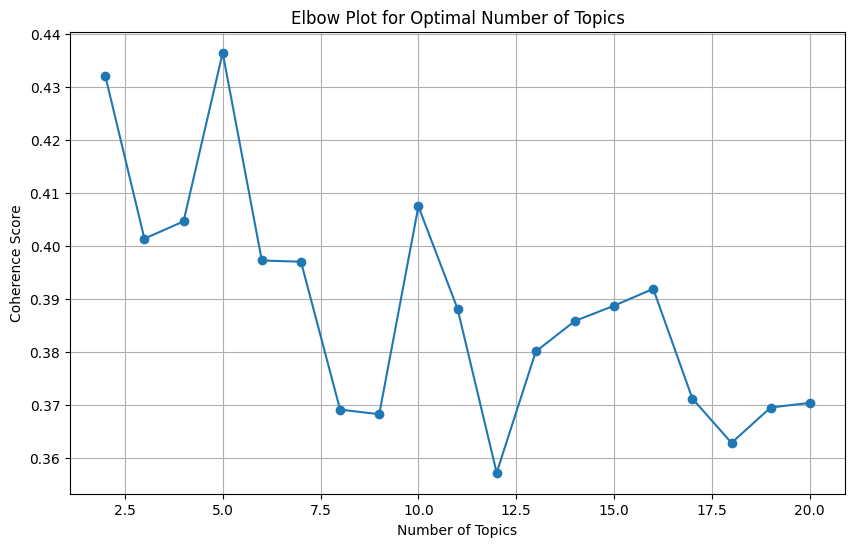

In [19]:
import matplotlib.pyplot as plt

# Define the range of topics to test
topic_numbers = range(2, 21)  # Testing from 2 to 20 topics
coherence_scores = []

# Loop over each topic number and train a model
for num_topics in topic_numbers:
    # Train the FLSA-W model with the current number of topics
    model = FLSA_W(input_file=processed_texts, num_topics=num_topics, num_words=10)
    model.get_matrices()  # Train the model to get topic distributions
    
    # Get coherence score for the current model
    coherence_score = model.get_coherence_score()
    coherence_scores.append(coherence_score)
    
    print(f"Number of topics: {num_topics}, Coherence Score: {coherence_score}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(topic_numbers, coherence_scores, marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Elbow Plot for Optimal Number of Topics")
plt.grid(True)
plt.savefig('elbow_plot.png')
plt.show()


In [20]:
#New model with 5 topics based on the elbow plot

flsaW3 = FLSA_W(input_file=processed_texts, num_topics=5, num_words=10) 
pwgt, ptgd = flsaW3.get_matrices()

# Display topics and evaluation metrics
print(flsaW3.show_topics()) 
print("Vocabulary Size:", flsaW3.get_vocabulary_size())
print("Coherence Score:", flsaW3.get_coherence_score())
print("Diversity Score:", flsaW3.get_diversity_score())
print("Interpretability Score:", flsaW3.get_interpretability_score())

for topic in flsaW3.show_topics(representation='words'):
    print(topic)

[(0, '0.001*"traded" + 0.0008*"reuters" + 0.0008*"composite" + 0.0008*"worst" + 0.0007*"lowest" + 0.0007*"sporting" + 0.0007*"ltd" + 0.0007*"previously" + 0.0007*"donald" + 0.0007*"chipmaker"'), (1, '0.002*"nvidia" + 0.002*"nvda" + 0.0019*"com" + 0.0018*"advanced" + 0.0017*"nasdaq" + 0.0017*"intc" + 0.0017*"rank" + 0.0016*"positive" + 0.0016*"released" + 0.0016*"among"'), (2, '0.0005*"gmt" + 0.0004*"outnumbered" + 0.0004*"settle" + 0.0004*"performer" + 0.0004*"slumped" + 0.0003*"dax" + 0.0003*"strategiesit" + 0.0003*"advancer" + 0.0003*"vaneck" + 0.0003*"aug"'), (3, '0.0128*"book" + 0.0104*"evolution" + 0.0091*"richard" + 0.008*"mind" + 0.0074*"certainty" + 0.0072*"professor" + 0.0066*"science" + 0.0066*"modern" + 0.0053*"synthesis" + 0.005*"inventing"'), (4, '0.0002*"premarket" + 0.0002*"company" + 0.0002*"market" + 0.0002*"also" + 0.0002*"nasdaq" + 0.0002*"stock" + 0.0002*"new" + 0.0002*"reiterates" + 0.0002*"time" + 0.0002*"one"')]
Vocabulary Size: 29031
Coherence Score: 0.436521344

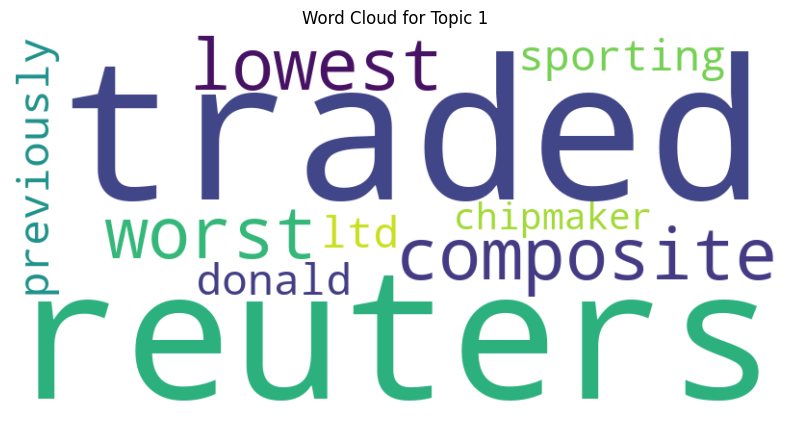

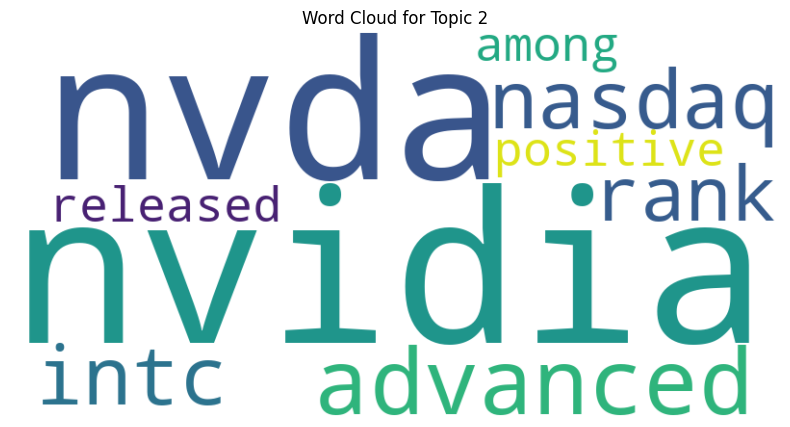

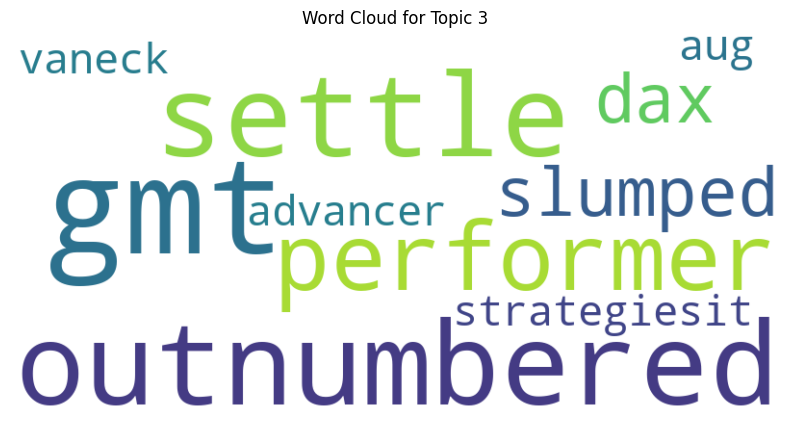

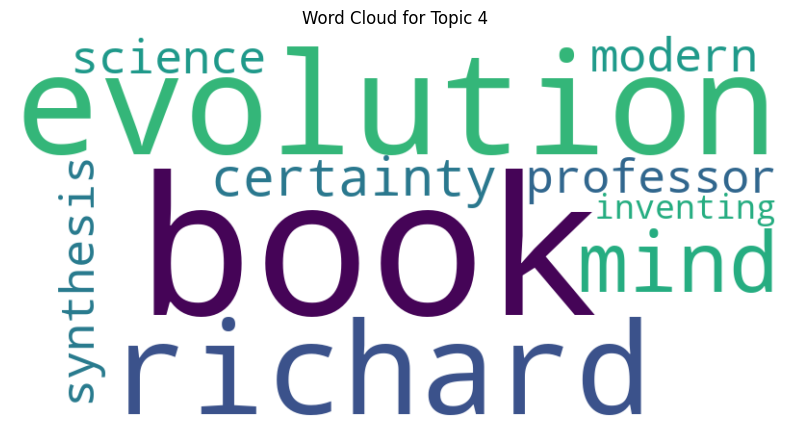

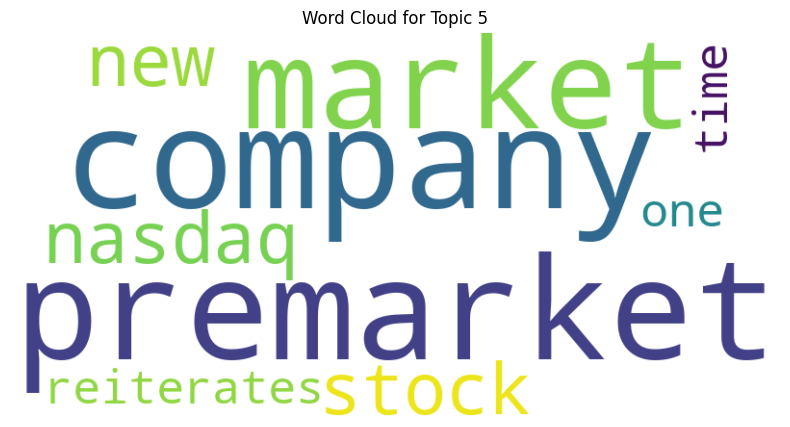

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for i, topic in enumerate(flsaW3.show_topics(representation='words')):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(topic))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Topic {i+1}")
    plt.show()
